# What Topics Should Candidates Address in Their 2020 Campaigns?

In [1]:
import pandas as pd

# importing json into pandas dataframe structure
proj_df = pd.read_json('combined.json', lines=True)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [3]:
# this is what our original json file looks like 
proj_df.head()

,components,contents,date,id,title,topics
0,[National Security Division (NSD)],"PORTLAND, Oregon. – Mohamed Osman Mohamud, 23,...",2014-10-01 04:00:00,None,Convicted Bomb Plotter Sentenced to 30 Years,[]
1,[Environment and Natural Resources Division],WASHINGTON – North Carolina’s Waccamaw River...,2012-07-25 04:00:00,12-919,$1 Million in Restitution Payments Announced t...,[]
2,[Environment and Natural Resources Division],BOSTON– A $1-million settlement has been...,2011-08-03 04:00:00,11-1002,$1 Million Settlement Reached for Natural Reso...,[]
3,[Environment and Natural Resources Division],WASHINGTON—A federal grand jury in Las Vegas...,2010-01-08 05:00:00,10-015,10 Las Vegas Men Indicted \r\nfor Falsifying V...,[]
4,[Environment and Natural Resources Division],"The U.S. Department of Justice, the U.S. Envir...",2018-07-09 04:00:00,18-898,$100 Million Settlement Will Speed Cleanup Wor...,[Environment]


In [4]:
# there were originally 13,087 rows and 6 columns 
proj_df.shape

(13087, 6)

**We are focusing only on the last two years (2017 and 2018). So, the next step is to filter our dataset to only those 2 years**

In [5]:
# Filter by last two years
import datetime as dt

proj_df['date'] = pd.to_datetime(proj_df['date'])

df_1718 = proj_df[proj_df['date'].dt.year >= 2017] # 2208 rows, nice!
df_1718.head()

,components,contents,date,id,title,topics
4,[Environment and Natural Resources Division],"The U.S. Department of Justice, the U.S. Envir...",2018-07-09 04:00:00,18-898,$100 Million Settlement Will Speed Cleanup Wor...,[Environment]
13,"[Criminal Division, USAO - Tennessee, Middle]",A 62-count second-superseding indictment was r...,2018-03-08 05:00:00,18-285,19 Members and Associates of Tennessee Mongols...,[]
15,"[National Security Division (NSD), USAO - Cali...","Federal authorities arrested Yi-Chi Shih, 62, ...",2018-01-23 05:00:00,18-78,2 Men Charged With Conspiring to Illegally Obt...,[]
16,"[National Security Division (NSD), USAO - Cali...","Federal authorities arrested Yi-Chi Shih, 62, ...",2018-01-23 05:00:00,18-78,2 Men Charged With Conspiring to Illegally Obt...,[]
19,"[Environment and Natural Resources Division, U...",The United States Attorney’s Office for the Mi...,2017-12-14 05:00:00,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,[Environment]


**Now we have 2208 rows and 6 columns. What we wish to do next is merge the 'contents' and 'title' columns to represent the content of each 'document.' The 'contents' and/or 'topics' columns will be considered our true y labels. The 'id' column will be disregarded as we do not believe it adds any value to our analysis.**

In [6]:
new_index = list(range(2208))

df_1718 = df_1718.set_index([pd.Index(new_index)])

## EXPLORING THE DATA

Text(0, 0.5, 'Raw count')

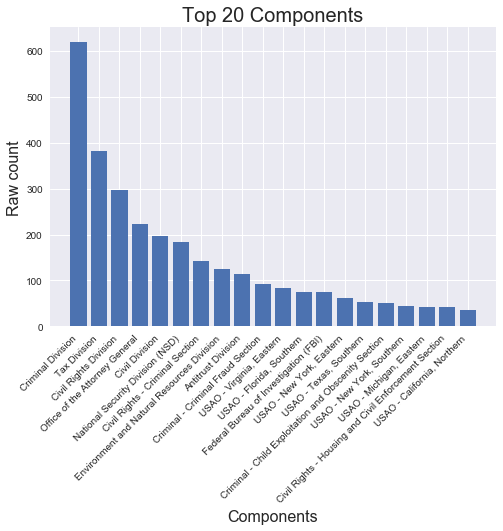

In [7]:
# Obtaining the frequency table for the components that appears in our data
from collections import Counter
component_counts = Counter()
for elem in df_1718['components']:
    for i in range(len(elem)):
        component_counts[elem[i]] += 1

# Sorting frequency table for histogram
from operator import itemgetter
sorted_components = sorted(component_counts.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# graphing the top components
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

num_top_components = 20
items = [item for item, count in sorted_components[:num_top_components]]
counts = [count for item, count in sorted_components[:num_top_components]]
plt.bar(range(num_top_components), counts)
plt.xticks(range(num_top_components), items, rotation=45, ha='right')
plt.title("Top 20 Components", fontsize = 20)
plt.xlabel('Components', fontsize = 16)
plt.ylabel('Raw count', fontsize = 16)

In [8]:
len(sorted_components)

137

Next, we will see which months had the most press releases from the DOJ. 

In [9]:
import datetime
import calendar
from operator import itemgetter
from collections import Counter

date_counts = Counter()
month_counts = Counter()
year_counts = Counter()

# Creates frequency tables for month, year,and month-year 
for elem in df_1718['date']:
    m = [elem.month, elem.strftime("%B")]
    y = elem.year
    m_y = m[1] + '-' + str(y)
    date_counts[m_y] += 1
    month_counts[m[0]] += 1
    year_counts[y] += 1

#sorts month table & prints results
sorted_months = sorted(month_counts.items(),
                      key=itemgetter(0))

for token, count in sorted_months:
    print(calendar.month_name[token], ":", count, 'articles')

January : 240 articles
February : 204 articles
March : 244 articles
April : 280 articles
May : 236 articles
June : 255 articles
July : 209 articles
August : 101 articles
September : 103 articles
October : 123 articles
November : 107 articles
December : 106 articles


## PREPARING DATA FOR ANALYSIS

In [10]:
# merging 'title' and 'contents' 
documents_df = df_1718["title"] + ' ' + df_1718["contents"] 

documents_df.head()

0    $100 Million Settlement Will Speed Cleanup Wor...
1    19 Members and Associates of Tennessee Mongols...
2    2 Men Charged With Conspiring to Illegally Obt...
3    2 Men Charged With Conspiring to Illegally Obt...
4    2017 Southeast Regional Animal Cruelty Prosecu...
dtype: object

In [11]:
# converting the df to a list to run topic modeling
documents_list = list(documents_df)

# confirming number of documents is 2208
len(documents_list)

2208

In [12]:
# how do we want to set max_df, min_df, etc?

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer does tokenization and can remove terms that occur too frequently, not frequently enough, or that are stop words
# document frequency (df) means number of documents a word appears in
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=50, stop_words='english') #set these based on LDA demo with news reports
tf = tf_vectorizer.fit_transform(documents_list)

In [13]:
# doesn't look like any cleaning was required
tf_vectorizer.vocabulary_

{'100': 2,
 'million': 1010,
 'settlement': 1439,
 'work': 1680,
 'site': 1459,
 'north': 1051,
 'justice': 883,
 'environmental': 578,
 'protection': 1253,
 'agency': 117,
 'epa': 579,
 'island': 852,
 'management': 965,
 'announced': 151,
 'today': 1569,
 'black': 233,
 'agreed': 122,
 'clean': 307,
 'project': 1236,
 'pleased': 1172,
 'reach': 1283,
 'resolution': 1346,
 'responsible': 1356,
 'parties': 1124,
 'said': 1389,
 'acting': 91,
 'assistant': 186,
 'general': 695,
 'jeffrey': 863,
 'wood': 1679,
 'environment': 577,
 'natural': 1037,
 'resources': 1351,
 'division': 515,
 'litigation': 935,
 'allows': 142,
 'important': 786,
 'citizens': 299,
 'living': 938,
 'demonstrates': 469,
 'working': 1683,
 'states': 1484,
 'federal': 636,
 'partners': 1126,
 'process': 1222,
 'administrator': 108,
 'andrew': 149,
 'wheeler': 1667,
 'national': 1034,
 'list': 933,
 '18': 10,
 'years': 1689,
 'taking': 1525,
 'charge': 281,
 'ensuring': 569,
 'makes': 961,
 'good': 703,
 'communitie

## SEEING WHICH WORDS ARE MOST POPULAR

In [14]:
unique_vocabulary = list(tf_vectorizer.vocabulary_.keys())

print("The number of unique words in the vocabulary is:", len(unique_vocabulary)) #cool!

The number of unique words in the vocabulary is: 1694


In [15]:
sorted(tf_vectorizer.vocabulary_.items(), reverse=True, key=itemgetter(0));
# Seems concerning to me that the number of words is backwards alphabetical...
# And the counts go down by exactly 1...

Let's take a closer look at the most popular words in the press releases.

This gives us the number of DOCUMENTS a words appears in, not the total number of times it appears at all.

In [16]:
# Sorting the dictionary by value
from operator import itemgetter
sorted_vocab = sorted(tf_vectorizer.vocabulary_.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# Printing the top 50 most frequent words, according to the number of documents they appear in!
index = 1
for lem, count in sorted_vocab[:50]:
    print("rank=", index, ' ', lem, ":", count)
    index += 1

rank= 1   zuckerman : 1693
rank= 2   young : 1692
rank= 3   york : 1691
rank= 4   yesterday : 1690
rank= 5   years : 1689
rank= 6   year : 1688
rank= 7   www : 1687
rank= 8   written : 1686
rank= 9   worth : 1685
rank= 10   world : 1684
rank= 11   working : 1683
rank= 12   workers : 1682
rank= 13   worked : 1681
rank= 14   work : 1680
rank= 15   wood : 1679
rank= 16   women : 1678
rank= 17   woman : 1677
rank= 18   witness : 1676
rank= 19   wire : 1675
rank= 20   williams : 1674
rank= 21   william : 1673
rank= 22   willfully : 1672
rank= 23   wife : 1671
rank= 24   wide : 1670
rank= 25   white : 1669
rank= 26   whistleblower : 1668
rank= 27   wheeler : 1667
rank= 28   western : 1666
rank= 29   west : 1665
rank= 30   week : 1664
rank= 31   websites : 1663
rank= 32   website : 1662
rank= 33   weapons : 1661
rank= 34   ways : 1660
rank= 35   way : 1659
rank= 36   water : 1658
rank= 37   waste : 1657
rank= 38   washington : 1656
rank= 39   warrant : 1655
rank= 40   wanted : 1654
rank= 41  

Now that we know the top words by the number of documents they appear in, let's take a look at the most frequently appearing words generally.

## SENTIMENT ANALYSIS

In [17]:
import spacy
nlp = spacy.load('en', disable=['ner', 'parser', 'tagger'])
import re

from collections import Counter
raw_lemma_cts_nostop = Counter()

# Step 2: Then count the number of times each word appears in the corpus (2208 press releases) and build a frequency table.
for doc in documents_list:
    nlp_doc = nlp(doc)
    for token in nlp_doc:
        lemmas = token.lemma_.lower()
        if re.match('[a-zA-Z]+$', lemmas) and not (nlp.vocab[lemmas].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
            raw_lemma_cts_nostop[lemmas] += 1

Now that we have performed natural language processing on the press releases using spacy, it's time to see which words appeared most frequently. 

In [18]:
# Step 3: Sort the table and print the top 50 most frequent words, along with their frequencies and ranks.
sorted_cts = sorted(raw_lemma_cts_nostop.items(),
                                  reverse=True,
                                  key=itemgetter(1))

# Printing the top 50 most frequent words, their counts (frequencies) and ranks. This table INCLUDES stopwords still. 
index = 1
for lem, count in sorted_cts[:50]:
    print("rank=", index, ' ', lem, ":", count)
    index += 1

rank= 1   attorney : 8978
rank= 2   department : 7443
rank= 3   district : 6269
rank= 4   division : 5781
rank= 5   justice : 5514
rank= 6   general : 4649
rank= 7   assistant : 4362
rank= 8   charge : 4117
rank= 9   office : 3952
rank= 10   criminal : 3853
rank= 11   tax : 3851
rank= 12   case : 3792
rank= 13   law : 3478
rank= 14   sentence : 3460
rank= 15   federal : 3384
rank= 16   fraud : 3292
rank= 17   acting : 3070
rank= 18   enforcement : 3031
rank= 19   guilty : 2995
rank= 20   today : 2933
rank= 21   united : 2815
rank= 22   states : 2704
rank= 23   court : 2640
rank= 24   year : 2562
rank= 25   prison : 2542
rank= 26   defendant : 2512
rank= 27   use : 2506
rank= 28   investigation : 2503
rank= 29   service : 2412
rank= 30   fbi : 2373
rank= 31   include : 2351
rank= 32   information : 2315
rank= 33   new : 2264
rank= 34   trial : 2253
rank= 35   pay : 2236
rank= 36   indictment : 2205
rank= 37   return : 2188
rank= 38   provide : 2156
rank= 39   state : 2127
rank= 40   age

Next, we will plot the top 20 words and their frequencies (raw counts).

Text(0, 0.5, 'Raw Count')

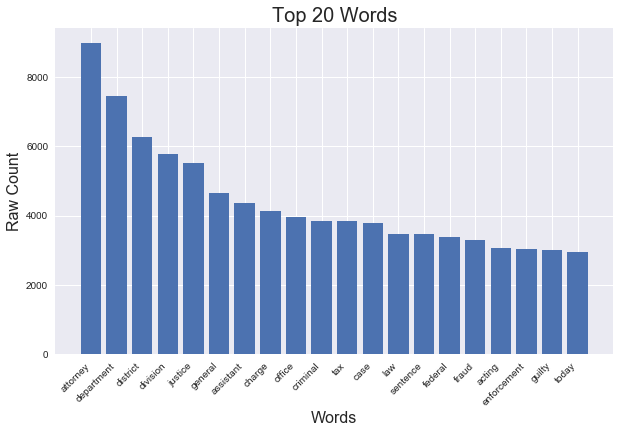

In [ ]:
num_top_words = 20
items = [item for item, count in sorted_cts[:num_top_words]]
counts = [count for item, count in sorted_cts[:num_top_words]]

plt.figure(figsize=(10,6))
plt.bar(range(num_top_words), counts)
plt.xticks(range(num_top_words), items, rotation=45, ha='right')
plt.title("Top 20 Words", fontsize = 20)
plt.xlabel('Words', fontsize = 16)
plt.ylabel('Raw Count', fontsize = 16)

Now, let's take a look at the top words within Tax Division.

**Before this next part we should get a list of the top 10 topics. Just run a counter and plot by components and/or topics. That way we have something to compare the next part to.**

**In order to run a counter and plot by components and topics, repleced [] in the topics to NA.**

In [ ]:
for i in range(len(df_1718)):
    if df_1718.iloc[i,5] == []:
        #print(df_1718.iloc[i,5])
        df_1718.iloc[i,5] = ['NA']  # I couldn't put list of NA...

In [ ]:
df_1718.head()

,components,contents,date,id,title,topics
0,[Environment and Natural Resources Division],"The U.S. Department of Justice, the U.S. Envir...",2018-07-09 04:00:00,18-898,$100 Million Settlement Will Speed Cleanup Wor...,[Environment]
1,"[Criminal Division, USAO - Tennessee, Middle]",A 62-count second-superseding indictment was r...,2018-03-08 05:00:00,18-285,19 Members and Associates of Tennessee Mongols...,NA
2,"[National Security Division (NSD), USAO - Cali...","Federal authorities arrested Yi-Chi Shih, 62, ...",2018-01-23 05:00:00,18-78,2 Men Charged With Conspiring to Illegally Obt...,NA
3,"[National Security Division (NSD), USAO - Cali...","Federal authorities arrested Yi-Chi Shih, 62, ...",2018-01-23 05:00:00,18-78,2 Men Charged With Conspiring to Illegally Obt...,NA
4,"[Environment and Natural Resources Division, U...",The United States Attorney’s Office for the Mi...,2017-12-14 05:00:00,17-1419,2017 Southeast Regional Animal Cruelty Prosecu...,[Environment]


**Count the number of topics. NA appears the most frequently, so NA is excluded from the ranking.**

In [ ]:
# Count the number of topics

topics = (df_1718.iloc[:,5])

from collections import Counter
topics_count = Counter()

for i in topics:
    topics_count[i[0]] += 1


from operator import itemgetter
sorted_topics = sorted(topics_count.items(),
                       reverse=True,
                       key=itemgetter(1))

# Printing the top 10 most frequent topics. 
index = 1
for lem, count in sorted_topics[1:11]:   # Since 'NA' comes top, 'NA' is excluded.
    print("rank=", index, ' ', lem, ":", count)
    index += 1

rank= 1   Tax : 333
rank= 2   Civil Rights : 132
rank= 3   Antitrust : 113
rank= 4   Counterterrorism : 109
rank= 5   Environment : 93
rank= 6   Consumer Protection : 82
rank= 7   False Claims Act : 81
rank= 8   Health Care Fraud : 68
rank= 9   Public Corruption : 59
rank= 10   Violent Crime : 58


In [ ]:
new_index = list(range(2208))

df_1718 = df_1718.set_index([pd.Index(new_index)])

**Since Tax shows up the most frequently and Tax Division also ranks the second in the components ranking above, we try to focus on Tax.**

In [ ]:
tax_indices = []
for i,j in enumerate(df_1718.iloc[:,5]):
    if j[0] == 'Tax':
        tax_indices.append(i)

df_1718_tax = df_1718.iloc[tax_indices,:]

print(len(df_1718_tax)) # The number of taxed comes up!

333


In [ ]:
df_1718_tax

,components,contents,date,id,title,topics
41,"[Tax Division, USAO - Alabama, Middle]","A Montgomery County, Alabama resident was sent...",2017-05-31 04:00:00,17-589,Alabama Man Sentenced to Prison for Filing Fra...,[Tax]
43,"[Tax Division, USAO - Alabama, Middle]","A Phenix City, Alabama, resident was sentenced...",2018-03-08 05:00:00,18-283,Alabama Resident and Ringleader of Multi-Milli...,[Tax]
44,"[Tax Division, USAO - Alabama, Middle]","A Phenix City, Alabama resident was convicted ...",2017-11-09 05:00:00,17-1276,Alabama Resident Convicted in Stolen Identity ...,[Tax]
45,"[Tax Division, USAO - Alabama, Middle]",WASHINGTON - A federal grand jury in Montgomer...,2018-04-05 04:00:00,18-412,Alabama Woman Indicted for Filing False Tax Re...,[Tax]
47,"[Tax Division, USAO - Alaska]",An Alaskan couple was charged in federal court...,2017-07-26 04:00:00,17-736,Alaskan Commercial Fishing Couple Charged with...,[Tax]
48,[Tax Division],A husband and wife pleaded guilty yesterday to...,2018-06-01 04:00:00,18-717,Alaskan Husband And Wife Plead Guilty To Willf...,[Tax]
197,"[Tax Division, USAO - Pennsylvania, Eastern]",A Republic of Benin man unlawfully residing in...,2017-09-27 04:00:00,17-1067,Benin Man Sentenced to Prison for Stolen Ident...,[Tax]
209,"[Tax Division, USAO - New York, Western]",Principal Deputy Assistant Attorney General Ri...,2018-04-18 04:00:00,18-503,Buffalo Man Pleads Guilty to Tax Evasion; Owes...,[Tax]
219,"[Tax Division, USAO - California, Central]",Evaded More than $8.3 Million in Federal Taxes...,2017-03-13 04:00:00,17-266,California Businessman Sentenced to Prison for...,[Tax]
221,"[Tax Division, USAO - California, Southern]","A Manhattan Beach, California resident was sen...",2017-09-11 04:00:00,17-989,California Internet Sales Company President Se...,[Tax]


In [ ]:
tax_df = df_1718_tax["title"] + ' ' + df_1718_tax["contents"] 
tax_list = list(tax_df)

In [ ]:
from collections import Counter
raw_lemma_tax = Counter()

tax_nlp = []

for doc in tax_list:
    nlp_doc = nlp(doc)
    tax_nlp.append(nlp_doc)
    for token in nlp_doc:
        lemmas = token.lemma_.lower()
        if re.match('[a-zA-Z]+$', lemmas) and not (nlp.vocab[lemmas].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE'):
            raw_lemma_tax[lemmas] += 1

In [ ]:
#Sort the table and print the top 20 most frequent words, along with their frequencies and ranks.
sorted_tax = sorted(raw_lemma_tax .items(),
                                  reverse=True,
                                  key=itemgetter(1))

index = 1
for lem, count in sorted_tax[:20]:
    print("rank=", index, ' ', lem, ":", count)
    index += 1

rank= 1   tax : 3321
rank= 2   return : 1556
rank= 3   attorney : 1434
rank= 4   division : 1234
rank= 5   irs : 1212
rank= 6   file : 855
rank= 7   assistant : 828
rank= 8   income : 676
rank= 9   business : 651
rank= 10   general : 647
rank= 11   prison : 623
rank= 12   deputy : 610
rank= 13   acting : 600
rank= 14   pay : 590
rank= 15   investigation : 575
rank= 16   year : 572
rank= 17   account : 539
rank= 18   false : 524
rank= 19   district : 522
rank= 20   court : 513


**Next, we did sentiment analysis using TextBlob. The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. If the polarity is negative, it shows that content is negative. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.**

In [ ]:
#Import modules

import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn
from textblob import TextBlob

In [ ]:
#Adding a column in the dataframe for the polarity and subjectivity

df_1718['polarity'] = df_1718['contents'].apply(lambda x: TextBlob(x).sentiment.polarity)
df_1718['subjectivity'] = df_1718['contents'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

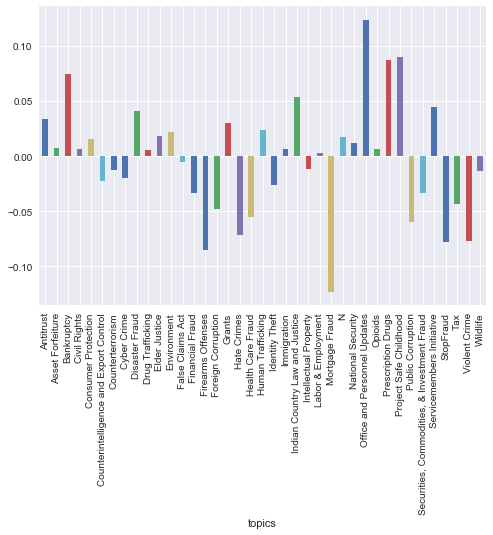

In [ ]:
# In order to use topics for group by function, I converted each topics into str.

for i, j in enumerate(df_1718.iloc[:,5]):
    df_1718.iloc[i,5] = j[0]

df_1718.groupby(df_1718.iloc[:,5])['polarity'].mean().plot.bar()

That makes sense that 

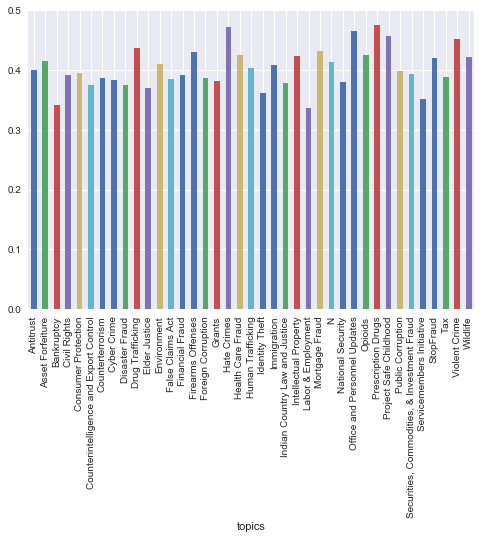

In [ ]:
df_1718.groupby(df_1718.iloc[:,5])['subjectivity'].mean().plot.bar()

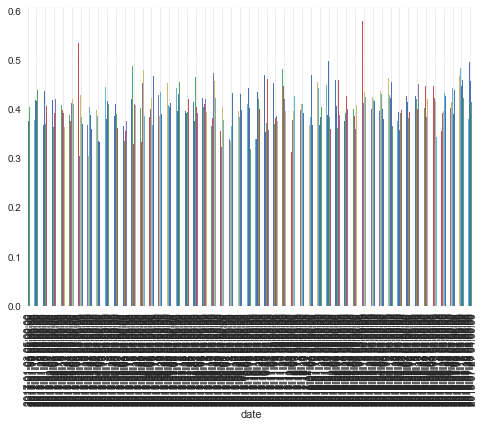

In [ ]:
df_1718.groupby('date')['subjectivity'].mean().plot.bar()  # It's better to define date

**Then, we try to figure out which words affects sentiment in the topic of tax.**

In [ ]:
# I also try to work on 'components'

all_our_topics = [i[0] for i in df_1718['components']]



unique_topics = set(all_our_topics)

for i in enumerate(unique_topics,1):
    print(i)

(1, 'Bureau of Justice Assistance (OJP)')
(2, 'USAO - Florida, Middle')
(3, 'Office on Violence Against Women')
(4, 'Federal Bureau of Prisons (BOP)')
(5, 'Bureau of Alcohol, Tobacco, Firearms and Explosives (ATF)')
(6, 'USAO - California, Southern')
(7, 'Office of the Associate Attorney General')
(8, 'Office of Information Policy')
(9, 'National Security Division (NSD)')
(10, 'U.S. Attorneys (USAO)')
(11, 'Office of Legal Policy')
(12, 'Office of the Deputy Attorney General')
(13, 'Office of Public Affairs')
(14, 'Criminal - Child Exploitation and Obscenity Section')
(15, 'USAO - Nevada')
(16, 'Civil Rights - Voting Section')
(17, 'Federal Bureau of Investigation (FBI)')
(18, 'Civil Rights - Criminal Section')
(19, 'Office of Tribal Justice')
(20, 'USAO - West Virginia, Southern')
(21, 'Criminal Division')
(22, 'U.S. Trustee Program')
(23, 'USAO - Tennessee, Middle')
(24, 'Asset Forfeiture Program')
(25, 'Environment and Natural Resources Division')
(26, 'Justice Management Division')

In [ ]:
df_1718['components']

0            [Environment and Natural Resources Division]
1           [Criminal Division, USAO - Tennessee, Middle]
2       [National Security Division (NSD), USAO - Cali...
3       [National Security Division (NSD), USAO - Cali...
4       [Environment and Natural Resources Division, U...
5                [Civil Division, USAO - Florida, Middle]
6                        [Office of the Attorney General]
7           [Criminal Division, USAO - Georgia, Northern]
8             [Criminal Division, USAO - Texas, Southern]
9           [Criminal Division, USAO - Georgia, Northern]
10      [Criminal Division, USAO - North Carolina, Wes...
11                                    [Criminal Division]
12                [Civil Division, USAO - South Carolina]
13                       [Office of the Attorney General]
14          [Criminal Division, USAO - Tennessee, Middle]
15                       [Office of the Attorney General]
16          [Criminal Division, USAO - Kentucky, Eastern]
17            

In [ ]:
new_components = []

for i, j in enumerate(df_1718.iloc[:,0]):
    component = []
    for q in j:
        if 'USAO' in q:
            component_word = 'USAO'
            component.append(component_word)
        elif 'Criminal - ' in q:
            component_word = 'Criminal'
            component.append(component_word)
        elif 'Civil Rights - ' in q:
            component_word = 'Civil Rights'
            component.append(component_word)
        else:
            component_word = q
            component.append(component_word)
    new_components.append(component)
            
            

In [ ]:
new_components

[['Environment and Natural Resources Division'],
 ['Criminal Division', 'USAO'],
 ['National Security Division (NSD)', 'USAO'],
 ['National Security Division (NSD)', 'USAO'],
 ['Environment and Natural Resources Division', 'USAO'],
 ['Civil Division', 'USAO'],
 ['Office of the Attorney General'],
 ['Criminal Division', 'USAO'],
 ['Criminal Division', 'USAO'],
 ['Criminal Division', 'USAO'],
 ['Criminal Division', 'USAO'],
 ['Criminal Division'],
 ['Civil Division', 'USAO'],
 ['Office of the Attorney General'],
 ['Criminal Division', 'USAO'],
 ['Office of the Attorney General'],
 ['Criminal Division', 'USAO'],
 ['Criminal Division'],
 ['Office of the Attorney General'],
 ['Asset Forfeiture Program', 'Tax Division', 'USAO'],
 ['Criminal Division', 'USAO'],
 ['Civil Rights Division', 'USAO'],
 ['Criminal Division', 'USAO'],
 ['Criminal Division', 'Criminal', 'USAO'],
 ['National Security Division (NSD)', 'USAO'],
 ['National Security Division (NSD)', 'USAO'],
 ['Antitrust Division'],
 ['N

## TOPIC MODELING

In [ ]:
num_topics = 10

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, learning_method='online', random_state=94775)
lda.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=10, n_jobs=None, n_topics=None, perp_tol=0.1,
             random_state=94775, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [ ]:
# confirming that we have 10 topics and 16,157 words per topic
lda.components_.shape

(10, 1694)

In [ ]:
# obtaining the distribution of words for each topic
import numpy as np
topic_word_distributions = np.array([topic_word_pseudocounts / np.sum(topic_word_pseudocounts)
                                     for topic_word_pseudocounts in lda.components_])

num_top_words = 10

print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
print()

for topic_idx in range(num_topics):
    print('[Topic ', topic_idx, ']', sep='')
    sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
    for rank in range(num_top_words):
        word_idx = sort_indices[rank]
        print(tf_vectorizer.get_feature_names()[word_idx], ':', round(topic_word_distributions[topic_idx, word_idx]*100,4),"%")
    print()

Displaying the top 10 words per topic and their probabilities within the topic...

[Topic 0]
immigration : 4.1489 %
general : 2.915 %
states : 2.3341 %
security : 2.2813 %
united : 2.1697 %
sessions : 1.9585 %
justice : 1.9308 %
ms : 1.6629 %
13 : 1.5526 %
law : 1.4212 %

[Topic 1]
drug : 2.127 %
enforcement : 1.5565 %
fraud : 1.2982 %
justice : 1.1467 %
said : 1.1245 %
western : 1.0674 %
antitrust : 1.04 %
drugs : 1.0289 %
district : 0.9977 %
law : 0.932 %

[Topic 2]
child : 2.9382 %
sexual : 2.4007 %
district : 1.9107 %
victims : 1.7772 %
justice : 1.6359 %
children : 1.5519 %
trafficking : 1.4258 %
case : 1.3663 %
pornography : 1.3058 %
exploitation : 1.2795 %

[Topic 3]
health : 2.9936 %
fraud : 2.4336 %
medicare : 2.3693 %
care : 2.0467 %
claims : 1.9286 %
services : 1.6592 %
million : 1.4197 %
office : 1.3738 %
false : 1.3028 %
general : 1.1389 %

[Topic 4]
district : 1.8597 %
criminal : 1.7293 %
guilty : 1.6286 %
division : 1.4546 %
assistant : 1.2991 %
case : 1.2565 %
office : 

We are thrilled by the results. We can clearly see distinct topics as follows:

 - Topic 0 refers to immigration issues, push factors such as gangs in Central American countries (i.e. MS13) and border security.
 - Topic 1 refers to drug issues and enforcement of drug laws. This topic likely correlates to Topic 0 on border security.
 - Topic 2 discusses sex trafficking and other sexual crimes.
 - Topic 3 is related to healthcare.
 - Topic 4 refers to crime more generally and the recent indictments around various groups (i.e. FBI).
 - Topic 5 corresponds to civil rights, justice and discrimination.
 - Topic 6 is again more general and discusses settlements.
 - Topic 7 refers to taxation, income and the IRS.
 - Topic 8 corresponds to harsh crimes involving prison.
 - Topic 9 discusses law enforcement and clashes with civil rights.

In a previous iteration, I feel like I saw an environment-related topic. But I am not seeing it now...

## Visualizing the document-topic proportion matrix in 2-D using t-SNE

In [ ]:
lda.fit(tf)
doc_topic_distribs = lda.transform(tf)

In [ ]:
doc_topic_distribs.shape # now we have the matrix of 2208 documents by the 10 topics

(2208, 10)

In [ ]:
prob_topic_assign = []
for app in doc_topic_distribs:
    prob = app.argmax()
    prob_topic_assign.append(prob)

In [ ]:
%%time
from sklearn.manifold import TSNE

# takes a minute to run, using settings used in homework 2
tsne = TSNE(n_components=2, random_state=94775, init='pca', angle=0.99)  
doc_topic_prop_tsne_2d = tsne.fit_transform(doc_topic_distribs)

In [ ]:
import seaborn as sns
ax = sns.scatterplot(x=doc_topic_prop_tsne_2d[:, 0], y=doc_topic_prop_tsne_2d[:, 1], hue=prob_topic_assign, legend="full",
                    palette="Spectral")
plt.legend(title="Topics")
plt.title("tSNE Plot of Press Releases Across the Ten Topics")
plt.show()

Press releases most likely to fall in topic 2 appear to be easily clustered and separated from other topics. This is not surprising since this topic seems to clearly refer to sex trafficking. This topic is not as connected to other topics. Additionally, topic 7 is pretty clearly separate from the other topics. This is also not surprising since it quite clearly refers to taxation. 

Topic 9 seems to mix with other topics in the plot. This is not surprising either since it is a bit more general, encompassing law enforcement and rights.

## CLUSTERING THE PRESS RELEASES

**Trying some Gaussian Mixture Modeling**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# creating an instance of the vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=50, stop_words='english')

# using the instance to construct a document matrix X
X = vectorizer.fit_transform(documents_list)
X = X.toarray()

# saving a list of unique words in the vocabulary
unique_vocabulary = list(vectorizer.vocabulary_.keys())

print("The number of unique words in the vocabulary is:", len(unique_vocabulary))

In [ ]:
%%time
from sklearn.metrics import calinski_harabaz_score
from sklearn.mixture import GaussianMixture

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

# see which number of clusters has highest CH index
for k in range(2, 6):
    candidate_gmm = GaussianMixture(n_components=k, n_init=1, random_state=94775)
    candidate_gmm.fit(X)
    cluster_assignments = candidate_gmm.predict(X)
    score = calinski_harabaz_score(X, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments = cluster_assignments
    
print('Best k within 2, 3, ..., 10 according to CH index:', best_k)

In [ ]:
from collections import Counter
assignments = Counter()

# looping over each cluster assignment
# counting the number of assignments per cluster
for item in list(best_cluster_assignments):
        assignments[item] += 1 

# printing the number of documents assigned to each cluster
print("Cluster", "# of Documents")
for k, v in assignments.items(): 
    print(str(k).ljust(10), str(v))

**A couple of ideas that i'd like to try... we can pick a word we think would best characterize the top n clusters and then use Professor Chen's homework 2 histogram idea (like spam vs ham) to see which word falls to what extent in which cluster. Next I shall try tsne**

In [ ]:
vocabulary = np.array(list(vectorizer.vocabulary_.keys()))

In [ ]:
get_indexes = lambda x, xs: [i for (y, i) in zip(xs, range(len(xs))) if x == y]
cluster0 = get_indexes(0,best_cluster_assignments)
cluster1 = get_indexes(1,best_cluster_assignments)

In [ ]:
comp_cluster0 = Counter()
comp_cluster1 = Counter()

for i in df_1718.loc[cluster0, "components"]:
    for j in i:
        comp_cluster0[j]+=1
        
for i in df_1718.loc[cluster1, "components"]:
    for j in i:
        comp_cluster1[j]+=1

from operator import itemgetter
sorted_cluster0 = sorted(comp_cluster0.items(),
                                  reverse=True,
                                  key=itemgetter(1))

sorted_cluster1 = sorted(comp_cluster1.items(),
                                  reverse=True,
                                  key=itemgetter(1))


print("Top 10 Components in Cluster 0:")
for k, v in sorted_cluster0[0:10]: 
    print(str(k).ljust(55), str(v))

print( )

print("Top 10 Components in Cluster 1:")
for k, v in sorted_cluster1[0:10]: 
    print(str(k).ljust(55), str(v))
    

**Trying out PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

In [ ]:
pca.explained_variance_ratio_
#very little explained

In [ ]:
%%time
from sklearn.metrics import calinski_harabaz_score

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

for k in range(2, 6):
    candidate_gmm = GaussianMixture(n_components=k, n_init=1, random_state=94775)
    candidate_gmm.fit(X_2d)
    cluster_assignments = candidate_gmm.predict(X_2d)
    score = calinski_harabaz_score(X_2d, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments_pca = cluster_assignments
    
print('Best k within 2, 3, ..., 10 according to CH index:', best_k)

In [ ]:
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=best_cluster_assignments_pca, cmap='Spectral')
plt.axis('equal')

**Trying out basic t-sne. Would need to play around with this more.**

## TSNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=94775)  # note: in practice you should actually play with the perplexity, learning rate, and number of iterations
X_tsne2d = tsne.fit_transform(X)

In [ ]:
%%time
from sklearn.metrics import calinski_harabaz_score

best_score = -np.inf
best_k = None
best_model = None
best_cluster_assignments = None

for k in range(2, 6):
    candidate_gmm = GaussianMixture(n_components=k, n_init=1, random_state=94775)
    candidate_gmm.fit(X_2d)
    cluster_assignments = candidate_gmm.predict(X_2d)
    score = calinski_harabaz_score(X_2d, cluster_assignments)
    
    print('k =', k, 'has CH index', score)
    
    if score > best_score:
        best_score = score
        best_k = k
        best_model = candidate_gmm
        best_cluster_assignments_tsne = cluster_assignments
    
print('Best k within 2, 3, ..., 10 according to CH index:', best_k)

In [ ]:
plt.scatter(X_tsne2d[:, 0], X_tsne2d[:, 1], c=best_cluster_assignments_tsne, cmap='Spectral')
plt.axis('equal')